In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

%matplotlib inline

In [2]:
data, target = make_regression(1000, 2, random_state = 123)

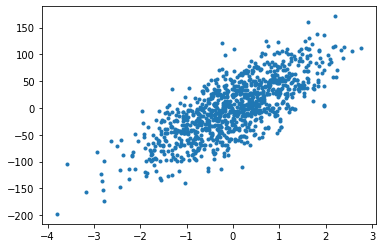

In [3]:
plt.plot(data[:,0],target,'.')
plt.show()

In [4]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

### Cтохастический градиентный спуск:

In [5]:
w = np.random.randn(2)
w_list = [w.copy()]
errors_s = []
eta = 0.001
max_iter = 750
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
lamb = 0.1 
np.random.seed(1234)
Q = [mserror(data, w, target)]

while weight_dist > min_weight_dist and iter_num < max_iter:
    
    train_ind = np.random.randint(data.shape[0])
    new_w = w - 2 * eta/(0+1) * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind]))
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    w_list.append(new_w.copy())
    errors_s.append(mserror(data, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 160.9426


### Градиентный спуск:

In [6]:
w_list = [w.copy()]
errors = []
eta = 0.001
max_iter = 750
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0

while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - target)) / target.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 8.7401


### Сводный график среднеквадратических ошибок двух градиентных спусков:

#### Для более наглядного отображения разницы данных пришлось снизить количество итераций до 750.

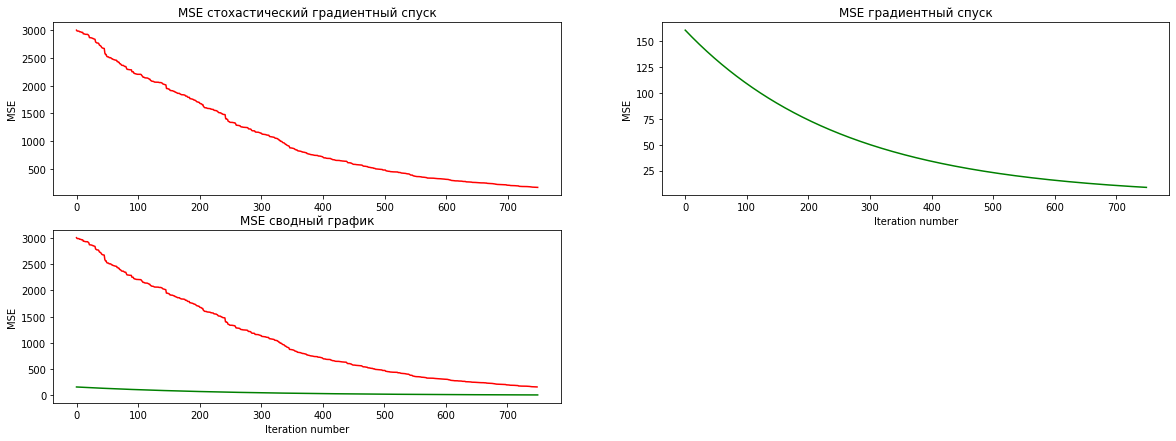

In [7]:
plt.figure(figsize=(20, 7))
plt.subplot(2, 2, 1)
plt.plot(range(len(errors_s)-1), errors_s[1:], color='r')
plt.title('MSE стохастический градиентный спуск')
#plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(False)                
plt.subplot(2, 2, 2)
plt.plot(range(len(errors)), errors, color='g')
plt.title('MSE градиентный спуск')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(False)               
plt.subplot(2, 2, 3)
plt.plot(range(len(errors)), errors, color='g')
plt.plot(range(len(errors_s)-1), errors_s[1:], color='r')
plt.title('MSE сводный график')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.grid(False)             

#### Вывод: в силу своих особенностей, график стохастческого градиентного спуска менее плавный чем график обычного градиентного спуска, а также имеет намного более высокие начальные значения ошибки. Стохастческому градиентному спуску требуется большее количество итераций для достижения минимального значения ошибки. Это хорошо видно при сравнении функционалов ошибок при равном количестве итераций обоих спусков.

### L2-регуляризация:

### Для более наглядной визуализации сравним стохастический градиентный спуск и стохастический градиентный спуск с L2-регуляризацией при числе итераций 1000:

In [8]:
w = np.random.randn(2)
w_list = [w.copy()]
errors_s_l2 = []
eta = 0.001
max_iter = 1000
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
lamb = 0.1
l2_lamb = 1e-2
np.random.seed(1234)

while weight_dist > min_weight_dist and iter_num < max_iter:
    
    train_ind = np.random.randint(data.shape[0])
    l2 = 2*l2_lamb*(w)
    dq_dw = 2 * np.dot(data[train_ind].T, (np.dot(data[train_ind],w)-target[train_ind]))
    new_w = w - eta * (dq_dw+l2)
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    w_list.append(new_w.copy())
    errors_s_l2.append(mserror(data, new_w, target))
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

In [9]:
w = np.random.randn(2)
w_list = [w.copy()]
errors_s = []
eta = 0.001
max_iter = 1000
min_weight_dist = 1e-8
weight_dist = np.inf
iter_num = 0
lamb = 0.1 
np.random.seed(1234)
Q = [mserror(data, w, target)]

while weight_dist > min_weight_dist and iter_num < max_iter:
    
    train_ind = np.random.randint(data.shape[0])
    new_w = w - 2 * eta/(0+1) * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind]))
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    w_list.append(new_w.copy())
    errors_s.append(mserror(data, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

В случае использования стохастического градиентного спуска функционал ошибки составляет 57.6493
В случае использования стохастического градиентного спуска с L2-регуляризацией функционал ошибки составляет 62.44


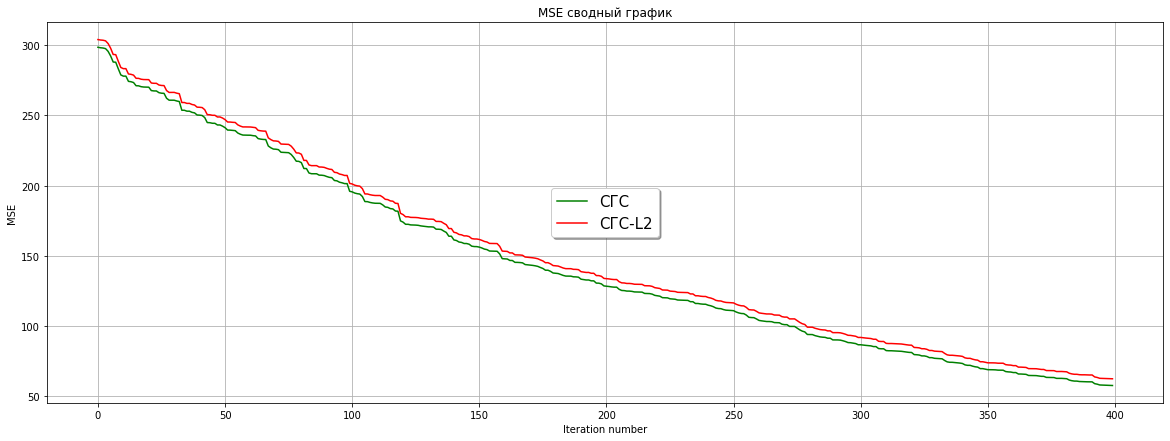

In [10]:
plt.figure(figsize=(20, 7))
# plt.plot(range(len(errors_s)), errors_s, color='g', label = 'СГС')
# plt.plot(range(len(errors_s_l2)-1), errors_s_l2[1:], color='r', label = 'СГС-L2')
plt.plot(range(len(errors_s)-600), errors_s[600:], color='g', label = 'СГС')
plt.plot(range(len(errors_s_l2)-600), errors_s_l2[600:], color='r', label = 'СГС-L2')
plt.title('MSE сводный график')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc = 'center', shadow = True, fontsize = 15)
plt.grid(True)       

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors_s[-1], 4)}')
print(f'В случае использования стохастического градиентного спуска с L2-регуляризацией функционал ошибки составляет {round(errors_s_l2[-1], 4)}')

#### Вывод: графики MSE двух моделей практически не отличаются, однако в случае использования стохастического градиентного спуска с L2-регуляризацией конечный функционал ошибки выше.

### 